In [70]:
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly"
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rc("figure", facecolor="white")
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')

In [78]:
df=pd.read_csv('preci_all.csv')
df.columns = ['Date','ddate','value','geo']
df['Date'] = df['Date'].astype(str).str[:-2].astype(str)
df['Date'].iloc[43]
df.columns

Index(['Date', 'ddate', 'value', 'geo'], dtype='object')

In [79]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y%m%d%H%M')
del df['ddate'],df['geo']
df

,Date,value
0,2000-06-01 00:00:00,0.0
1,2000-06-01 00:30:00,0.0
2,2000-06-01 01:00:00,0.0
3,2000-06-01 01:30:00,0.0
4,2000-06-01 02:00:00,0.0
...,...,...
355008,2020-08-31 08:00:00,0.0
355009,2020-08-31 08:30:00,0.0
355010,2020-08-31 09:00:00,0.0
355011,2020-08-31 09:30:00,0.0


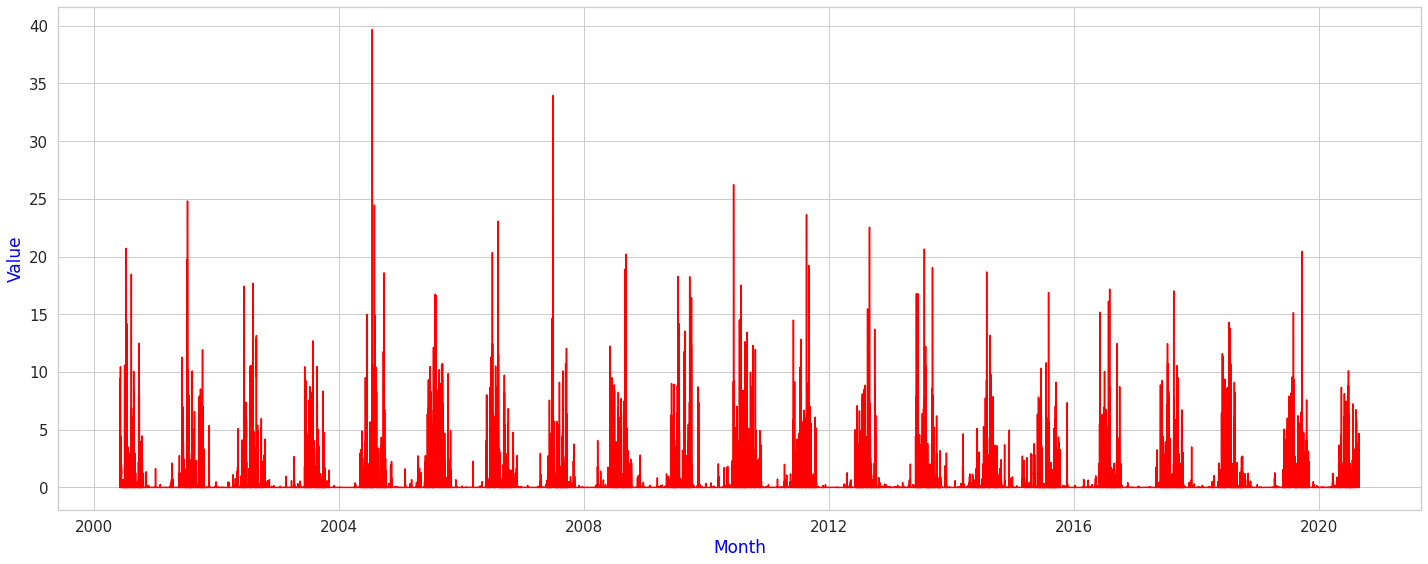

In [80]:
fig,ax = plt.subplots(1,1,figsize=(20,8))
sns.lineplot(df['Date'],df['value'],color='red')
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.show()

In [82]:
df['Date'] = df['Date'].astype('datetime64')
df['doy'] = df['Date'].dt.dayofyear.astype(str) + '-' + df['Date'].dt.hour.astype(str) + '-' + df['Date'].dt.minute.astype(str)
df['Y'] = df['Date'].dt.year
df=df.sort_values(by='Date')
df.head()

,Date,value,doy,Y
0,2000-06-01 00:00:00,0.0,153-0-0,2000
1,2000-06-01 00:30:00,0.0,153-0-30,2000
2,2000-06-01 01:00:00,0.0,153-1-0,2000
3,2000-06-01 01:30:00,0.0,153-1-30,2000
4,2000-06-01 02:00:00,0.0,153-2-0,2000


In [141]:
dfp =df.pivot(index = 'doy', columns = 'Y', values = 'value')
dfp['plotdate'] = dfp.index
dfp['plotdate'] = pd.to_datetime(dfp.plotdate,format='%j-%H-%M')
dfp.head()

Y,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,plotdate
doy,,,,,,,,,,,,,,,,,,,,,
1-0-0,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900-01-01 00:00:00
1-0-30,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900-01-01 00:30:00
1-1-0,NaN,0.0,0.0,0.0,0.0,0.000000,0.001132,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900-01-01 01:00:00
1-1-30,NaN,0.0,0.0,0.0,0.0,0.000000,0.002730,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900-01-01 01:30:00
1-10-0,NaN,0.0,0.0,0.0,0.0,0.000144,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900-01-01 10:00:00


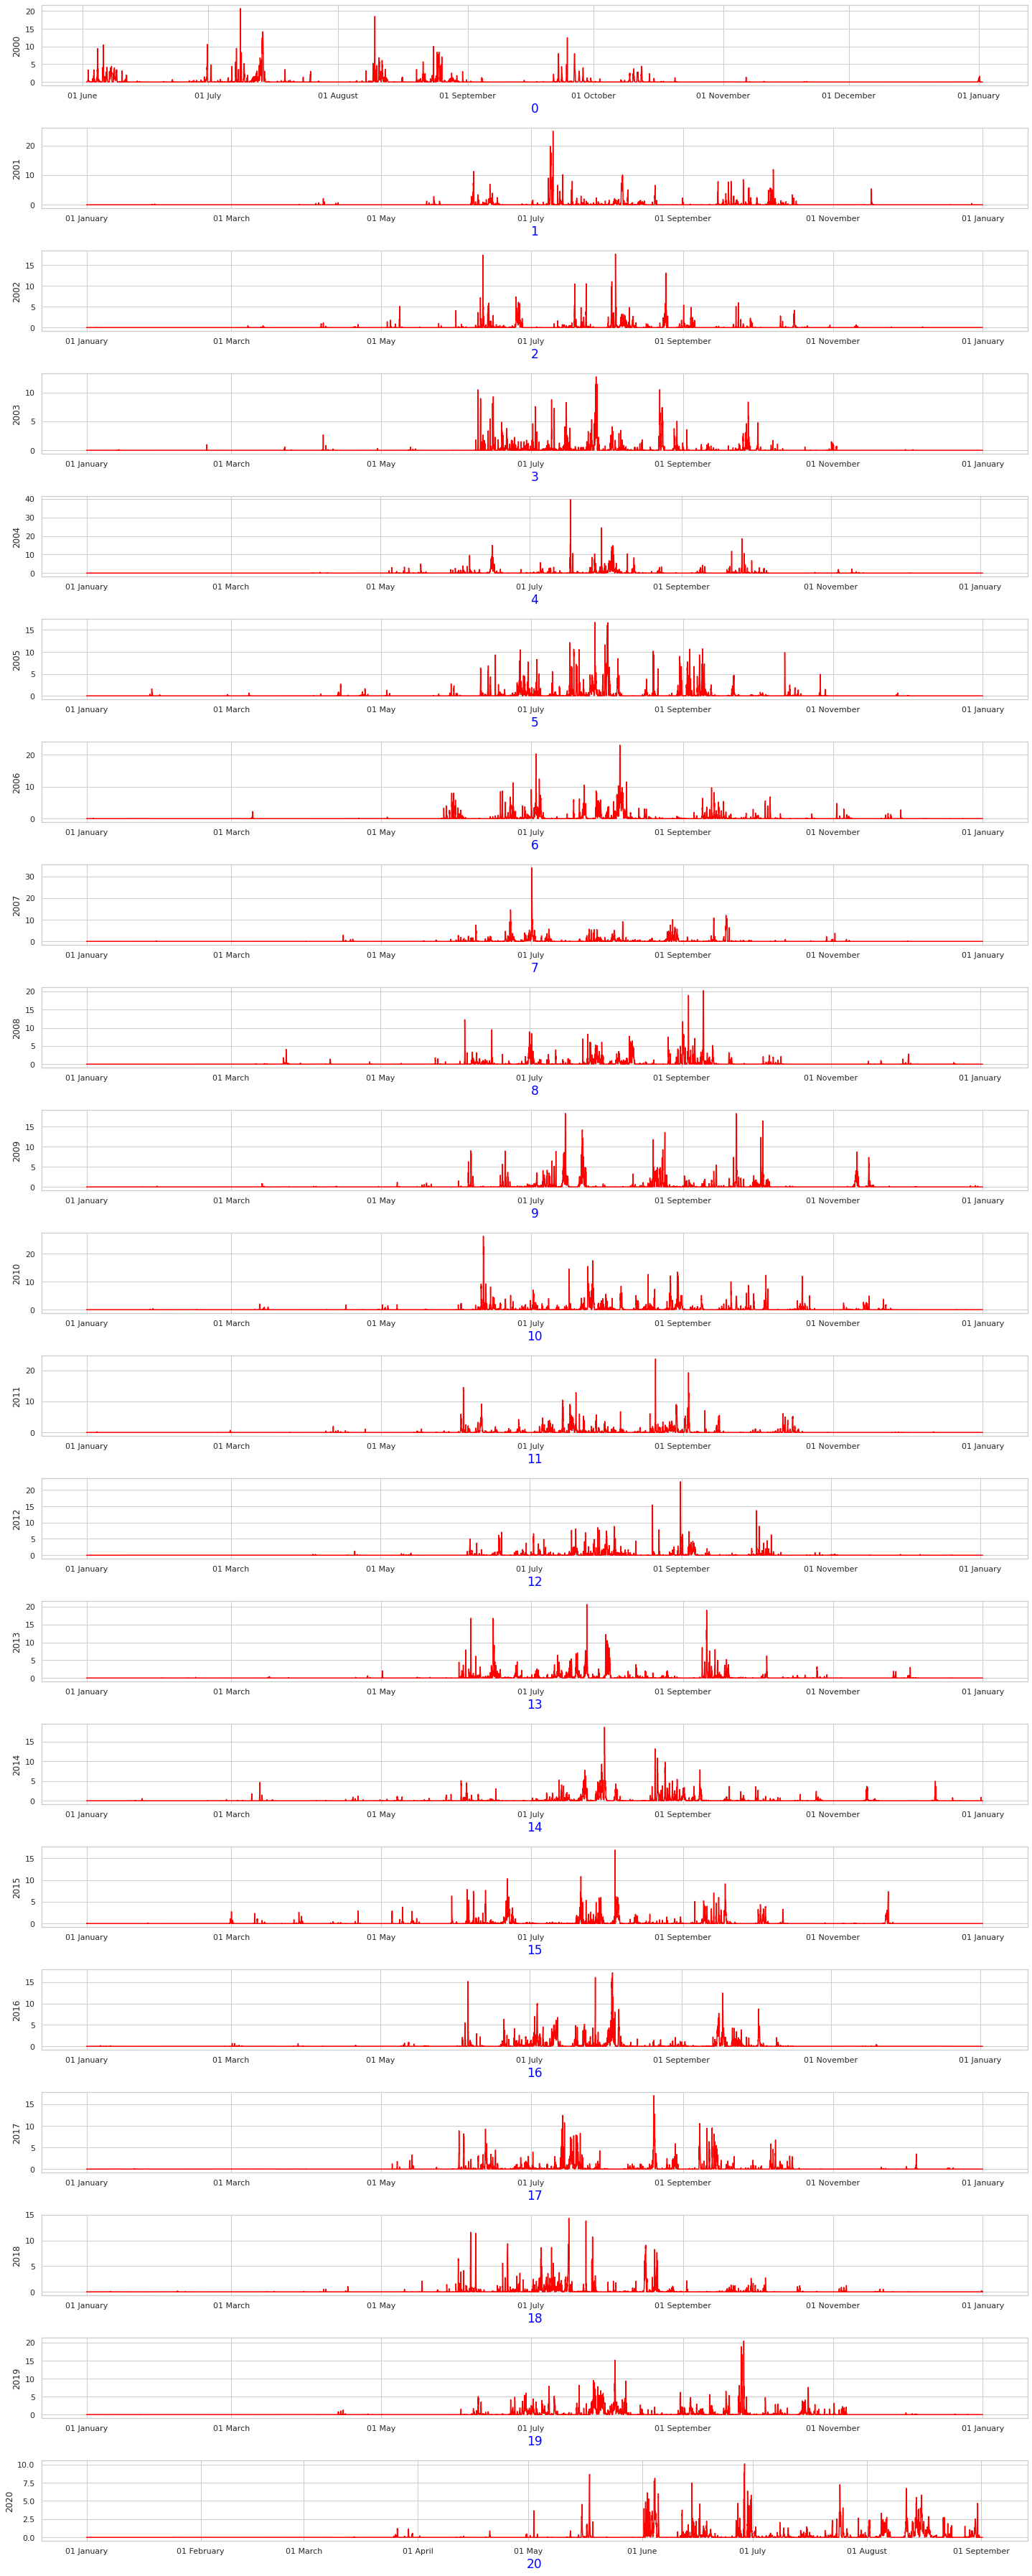

In [99]:
fig,ax = plt.subplots(21,1,figsize=(20,50))
j=2000
for i in range(0,21):
    sns.lineplot(dfp['plotdate'],dfp[j],ax=ax[i],color='red')
    j+=1
    ax[i].set_xlabel(i, fontsize=17,c='blue')
    myFmt = DateFormatter("%d %B")
    ax[i].xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

In [116]:
dfsum = df.groupby(df.Date.dt.year).sum()
dfsum.head(3)

,value,Y
Date,,
2000,2172.772954,20544000
2001,2338.557355,35057520
2002,1867.350699,35075040


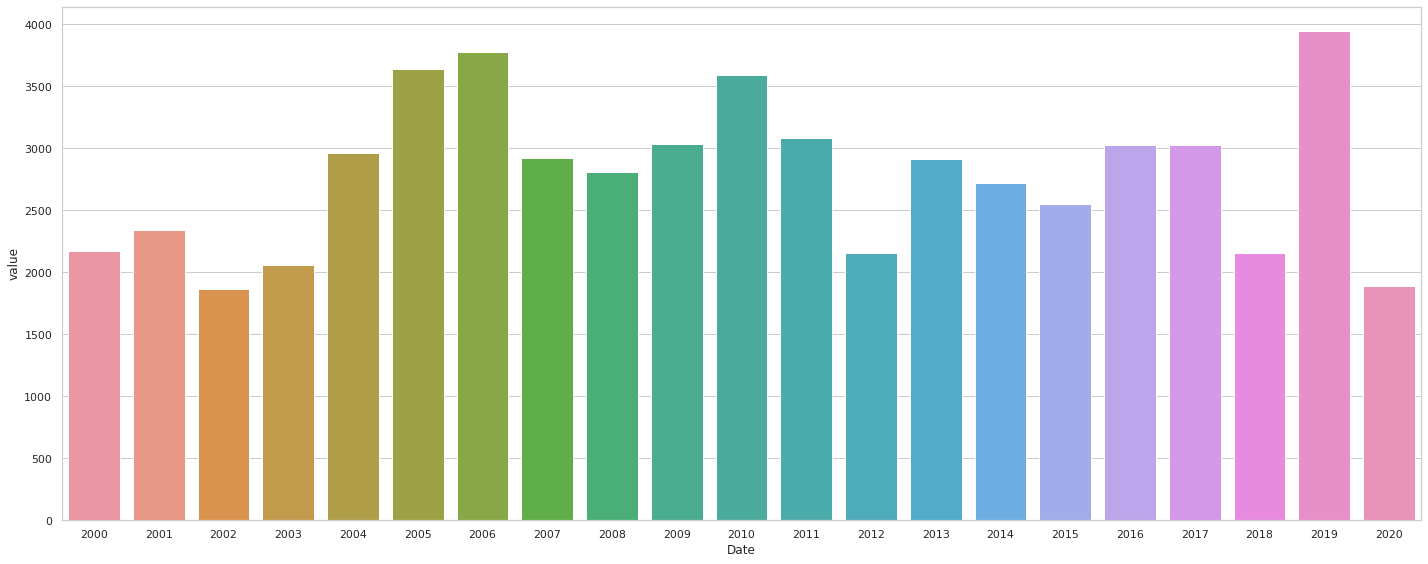

In [119]:
fig,ax = plt.subplots(1,1,figsize=(20,8))
sns.barplot(dfsum.index,dfsum['value'])
plt.tight_layout()
plt.show()